## **Project Title: Income Level Prediction with Machine Learning**

### **Project Overview**
This project aims to develop a machine learning model that predicts whether a person's income exceeeds `$50k` based on `census data`. In this project, I will go through all the essential steps-from `data cleaning` to `feature engineering` and `model building;` ensuring a structured, well-documented workflow.

## **Data Collection and Preparation**

### **Load and Inspect the Dataset**
Start by loading the dataset `income_data.csv` and inspecting its structure

In [55]:
# sklearn

# import your library
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# importing sklearn functions and classes
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import (
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
    classification_report,
    confusion_matrix,
    roc_auc_score,
    roc_curve
)

In [56]:
# import our datasets
file_name = "income_data.csv"

df = pd.read_csv(file_name)

display(df)

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48837,39,Private,215419,Bachelors,13,Divorced,Prof-specialty,Not-in-family,White,Female,0,0,36,United-States,<=50K
48838,64,NaN,321403,HS-grad,9,Widowed,NaN,Other-relative,Black,Male,0,0,40,United-States,<=50K
48839,38,Private,374983,Bachelors,13,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,50,United-States,<=50K
48840,44,Private,83891,Bachelors,13,Divorced,Adm-clerical,Own-child,Asian-Pac-Islander,Male,5455,0,40,United-States,<=50K


In [57]:
# examining or exploring my data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             48842 non-null  int64 
 1   workclass       47879 non-null  object
 2   fnlwgt          48842 non-null  int64 
 3   education       48842 non-null  object
 4   education-num   48842 non-null  int64 
 5   marital-status  48842 non-null  object
 6   occupation      47876 non-null  object
 7   relationship    48842 non-null  object
 8   race            48842 non-null  object
 9   sex             48842 non-null  object
 10  capital-gain    48842 non-null  int64 
 11  capital-loss    48842 non-null  int64 
 12  hours-per-week  48842 non-null  int64 
 13  native-country  48568 non-null  object
 14  income          48842 non-null  object
dtypes: int64(6), object(9)
memory usage: 5.6+ MB


In [58]:
df.describe(include='all')

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
count,48842.000000,47879,4.884200e+04,48842,48842.000000,48842,47876,48842,48842,48842,48842.000000,48842.000000,48842.000000,48568,48842
unique,NaN,9,NaN,16,NaN,7,15,6,5,2,NaN,NaN,NaN,42,2
top,NaN,Private,NaN,HS-grad,NaN,Married-civ-spouse,Prof-specialty,Husband,White,Male,NaN,NaN,NaN,United-States,<=50K
freq,NaN,33906,NaN,15784,NaN,22379,6172,19716,41762,32650,NaN,NaN,NaN,43832,37155
mean,38.643585,NaN,1.896641e+05,NaN,10.078089,NaN,NaN,NaN,NaN,NaN,1079.067626,87.502314,40.422382,NaN,NaN
std,13.710510,NaN,1.056040e+05,NaN,2.570973,NaN,NaN,NaN,NaN,NaN,7452.019058,403.004552,12.391444,NaN,NaN
min,17.000000,NaN,1.228500e+04,NaN,1.000000,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,1.000000,NaN,NaN
25%,28.000000,NaN,1.175505e+05,NaN,9.000000,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,40.000000,NaN,NaN
50%,37.000000,NaN,1.781445e+05,NaN,10.000000,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,40.000000,NaN,NaN
75%,48.000000,NaN,2.376420e+05,NaN,12.000000,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,45.000000,NaN,NaN


In [59]:
df.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
age,48842.0,NaN,NaN,NaN,38.643585,13.71051,17.0,28.0,37.0,48.0,90.0
workclass,47879,9,Private,33906,NaN,NaN,NaN,NaN,NaN,NaN,NaN
fnlwgt,48842.0,NaN,NaN,NaN,189664.134597,105604.025423,12285.0,117550.5,178144.5,237642.0,1490400.0
education,48842,16,HS-grad,15784,NaN,NaN,NaN,NaN,NaN,NaN,NaN
education-num,48842.0,NaN,NaN,NaN,10.078089,2.570973,1.0,9.0,10.0,12.0,16.0
marital-status,48842,7,Married-civ-spouse,22379,NaN,NaN,NaN,NaN,NaN,NaN,NaN
occupation,47876,15,Prof-specialty,6172,NaN,NaN,NaN,NaN,NaN,NaN,NaN
relationship,48842,6,Husband,19716,NaN,NaN,NaN,NaN,NaN,NaN,NaN
race,48842,5,White,41762,NaN,NaN,NaN,NaN,NaN,NaN,NaN
sex,48842,2,Male,32650,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [60]:
# using simple imputer to handle missing values
# separate the data into numerical and categorical sets

num_var = df.select_dtypes(include=np.number)
cat_var = df.select_dtypes(exclude=np.number)

cat_var

,workclass,education,marital-status,occupation,relationship,race,sex,native-country,income
0,State-gov,Bachelors,Never-married,Adm-clerical,Not-in-family,White,Male,United-States,<=50K
1,Self-emp-not-inc,Bachelors,Married-civ-spouse,Exec-managerial,Husband,White,Male,United-States,<=50K
2,Private,HS-grad,Divorced,Handlers-cleaners,Not-in-family,White,Male,United-States,<=50K
3,Private,11th,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,United-States,<=50K
4,Private,Bachelors,Married-civ-spouse,Prof-specialty,Wife,Black,Female,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...
48837,Private,Bachelors,Divorced,Prof-specialty,Not-in-family,White,Female,United-States,<=50K
48838,NaN,HS-grad,Widowed,NaN,Other-relative,Black,Male,United-States,<=50K
48839,Private,Bachelors,Married-civ-spouse,Prof-specialty,Husband,White,Male,United-States,<=50K
48840,Private,Bachelors,Divorced,Adm-clerical,Own-child,Asian-Pac-Islander,Male,United-States,<=50K


In [61]:
num_var

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week
0,39,77516,13,2174,0,40
1,50,83311,13,0,0,13
2,38,215646,9,0,0,40
3,53,234721,7,0,0,40
4,28,338409,13,0,0,40
...,...,...,...,...,...,...
48837,39,215419,13,0,0,36
48838,64,321403,9,0,0,40
48839,38,374983,13,0,0,50
48840,44,83891,13,5455,0,40


In [62]:
df

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48837,39,Private,215419,Bachelors,13,Divorced,Prof-specialty,Not-in-family,White,Female,0,0,36,United-States,<=50K
48838,64,NaN,321403,HS-grad,9,Widowed,NaN,Other-relative,Black,Male,0,0,40,United-States,<=50K
48839,38,Private,374983,Bachelors,13,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,50,United-States,<=50K
48840,44,Private,83891,Bachelors,13,Divorced,Adm-clerical,Own-child,Asian-Pac-Islander,Male,5455,0,40,United-States,<=50K


In [63]:
# creating a copy of my df
df_copy = df.copy()

In [64]:
# Drop columns that may not add value to income prediction
df.drop(columns=["fnlwgt"], inplace=True)

In [65]:
# Check whether irrelevant columns has been removed
print(df.columns)

Index(['age', 'workclass', 'education', 'education-num', 'marital-status',
       'occupation', 'relationship', 'race', 'sex', 'capital-gain',
       'capital-loss', 'hours-per-week', 'native-country', 'income'],
      dtype='object')


In [66]:
# Check for missing values
print(df.isnull().sum())

age                 0
workclass         963
education           0
education-num       0
marital-status      0
occupation        966
relationship        0
race                0
sex                 0
capital-gain        0
capital-loss        0
hours-per-week      0
native-country    274
income              0
dtype: int64


In [67]:
# Fill missing values with mode for categorical and median for numerical columns
df.fillna(df.mode().iloc[0], inplace=True)

In [68]:
print(df.isnull().sum())    # Displays the count of remaining missing values for each column

age               0
workclass         0
education         0
education-num     0
marital-status    0
occupation        0
relationship      0
race              0
sex               0
capital-gain      0
capital-loss      0
hours-per-week    0
native-country    0
income            0
dtype: int64


## **Exploratory Data Analysis (EDA)**

### **Generating at least 5 meaningful insights from the data with appropriate visualizations.** These will involve:
- Examining relationships between features like education, occupation, hours worked, capital gain/loss.
- Identifying key patterns and trends (e.g., education & capital-gain as strong income predictors).
- Using data visualizations and summary statistics effectively.

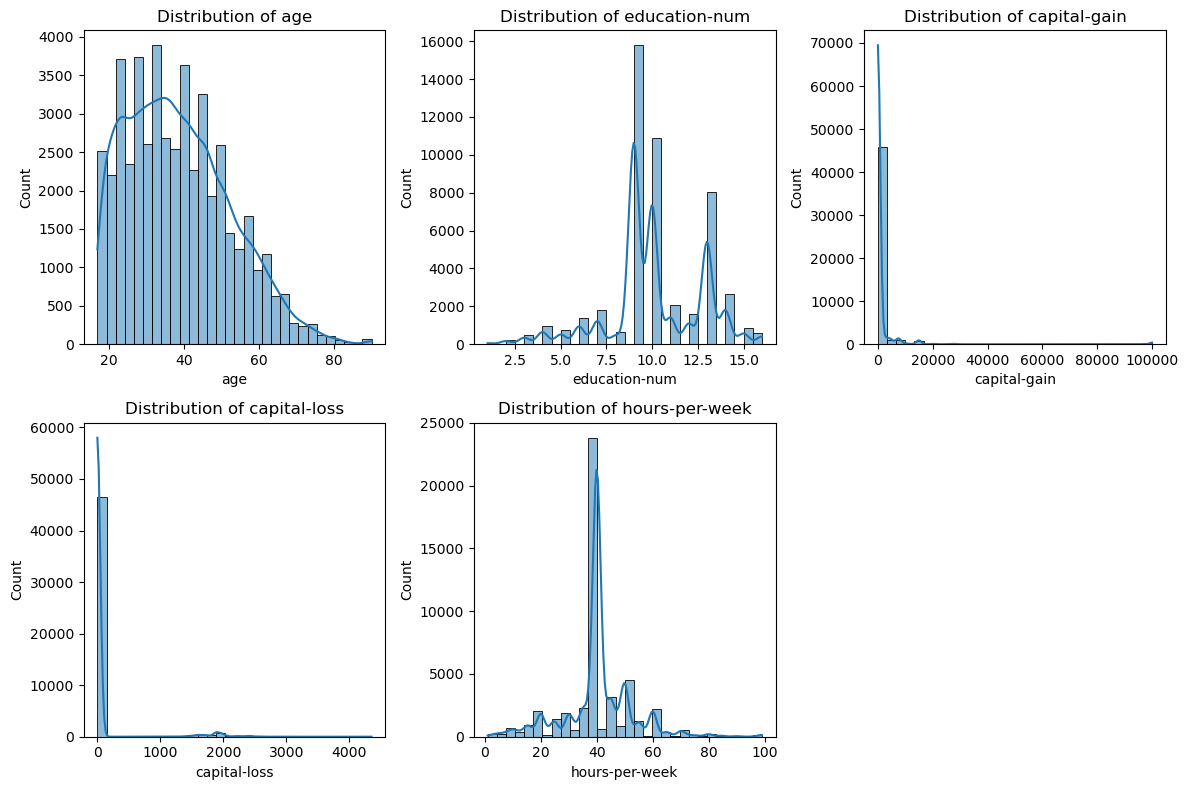

In [69]:
# Understand Feature Distributions
# Visualizing numerical variables (age, capital-gain, hours-per-week, etc.) to identify patterns and outliers.

import matplotlib.pyplot as plt
import seaborn as sns

# Plot distributions of numerical variables
numerical_cols = ["age", "education-num", "capital-gain", "capital-loss", "hours-per-week"]

plt.figure(figsize=(12,8))
for i, col in enumerate(numerical_cols):
    plt.subplot(2, 3, i+1)
    sns.histplot(df[col], bins=30, kde=True)
    plt.title(f"Distribution of {col}")

plt.tight_layout()
plt.show()

## **Age and Income Relationship**
### **Goal:** See how categorical features **impact income level.**

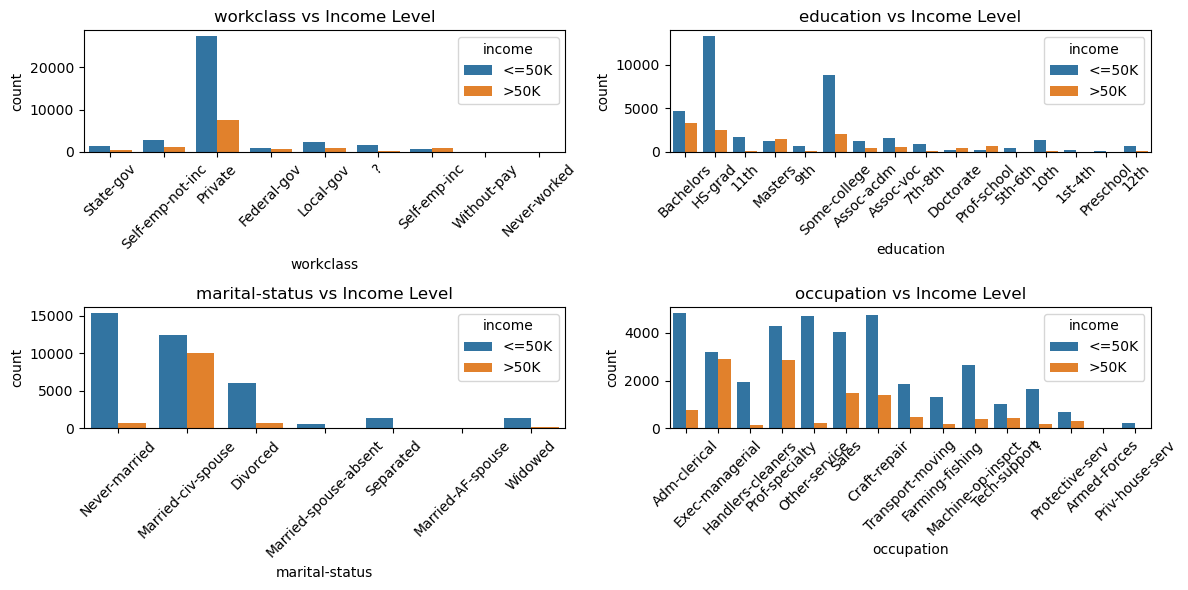

In [70]:
# Identifying Relationships Between Features and Income
# Bar plot for categorical variables vs income

categorical_cols = ["workclass", "education", "marital-status", "occupation", "relationship", "race", "sex", "native-country"]

plt.figure(figsize=(12,6))
for i, col in enumerate(categorical_cols[:4]):    # Display first 4 categorical variables
    plt.subplot(2, 2, i+1)
    sns.countplot(data=df, x=col, hue="income")
    plt.xticks(rotation=45)
    plt.title(f"{col} vs Income Level")

plt.tight_layout()
plt.show()

## **Finding Correlation & Feature Dependencies**

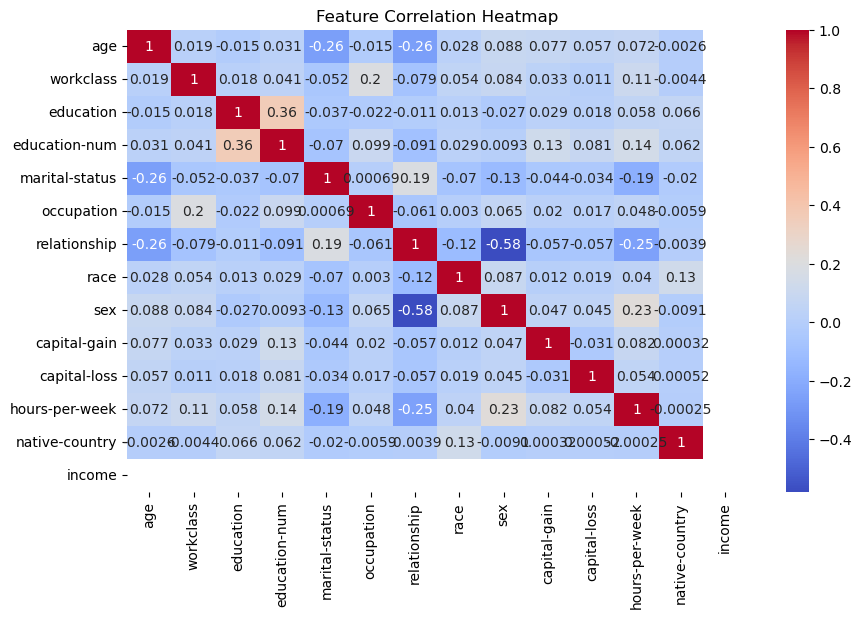

In [71]:
# Using a correlation heatmap to see which numerical variables strongly influence income prediction.
# Encode categorical variables for correlation analysis
df_encoded = df.copy()

# Convert categorical columns to numerical codes
for col in categorical_cols:
    df_encoded[col] = df_encoded[col].astype("category").cat.codes

# Convert income column to binary (1 for ">50k", 0 for "<=50k")
df_encoded["income"] = df_encoded["income"].apply(lambda x: 1 if x == ">50k" else 0)

# Correlation heatmap
plt.figure(figsize=(10,6))
sns.heatmap(df_encoded.corr(), annot=True, cmap="coolwarm")
plt.title("Feature Correlation Heatmap")
plt.show()

## **Spot Outliers Affecting Predictions**

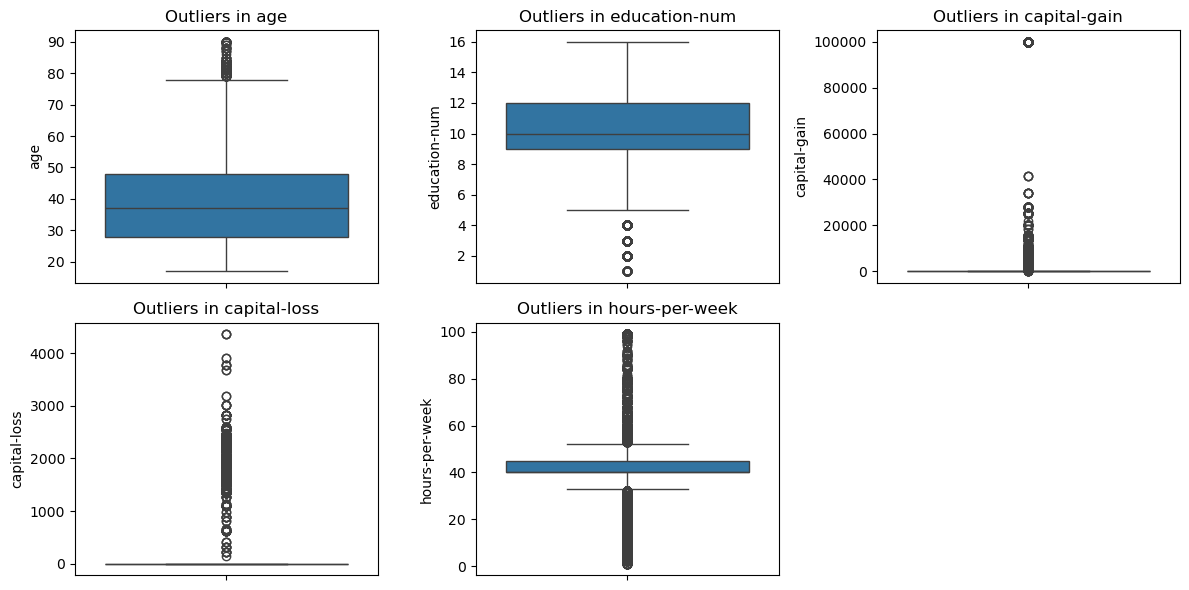

In [72]:
# Using boxplots to detect extreme values in numerical variables.
plt.figure(figsize=(12,6))
for i, col in enumerate(numerical_cols):
    plt.subplot(2, 3, i+1)
    sns.boxplot(y=df[col])
    plt.title(f"Outliers in {col}")

plt.tight_layout()
plt.show()

# **Uncover Patterns in Categorical Features**

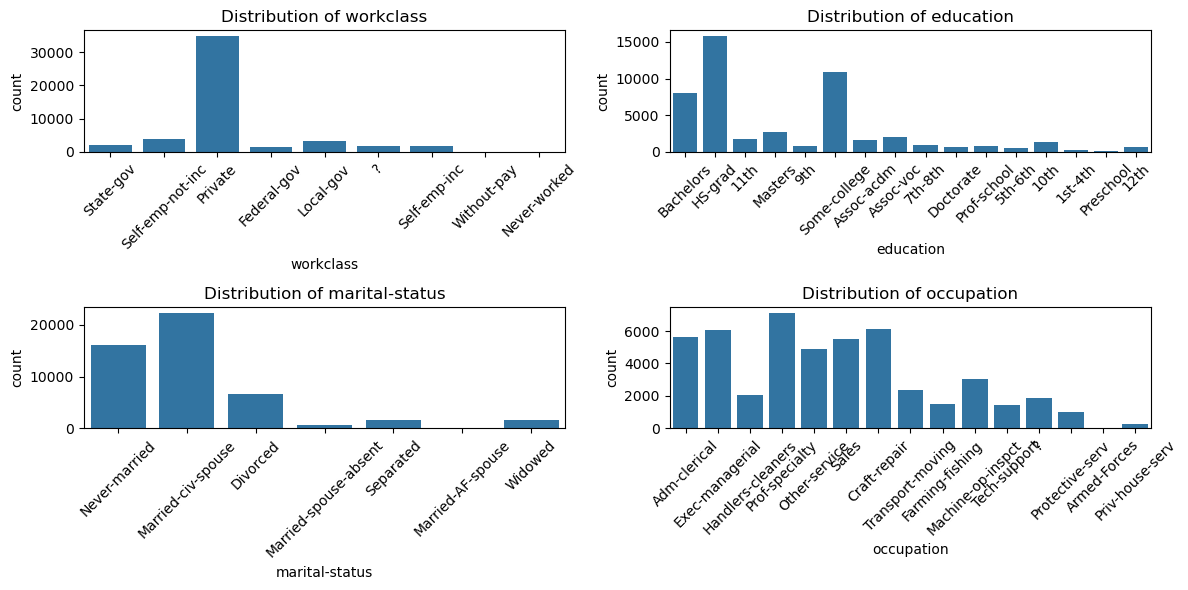

In [73]:
# Showing the distribution of categorical variables and check imbalanced categories.
# Count plots for categorical distributions
plt.figure(figsize=(12,6))
for i, col in enumerate(categorical_cols[:4]):    # Show first 4
    plt.subplot(2, 2, i+1)
    sns.countplot(data=df, x=col)
    plt.xticks(rotation=45)
    plt.title(f"Distribution of {col}")

plt.tight_layout()
plt.show()

In [74]:
# using simple imputer to handle missing values
# separate the data into numerical and categorical sets

num_var = df.select_dtypes(include=np.number)
cat_var = df.select_dtypes(exclude=np.number)

cat_var

,workclass,education,marital-status,occupation,relationship,race,sex,native-country,income
0,State-gov,Bachelors,Never-married,Adm-clerical,Not-in-family,White,Male,United-States,<=50K
1,Self-emp-not-inc,Bachelors,Married-civ-spouse,Exec-managerial,Husband,White,Male,United-States,<=50K
2,Private,HS-grad,Divorced,Handlers-cleaners,Not-in-family,White,Male,United-States,<=50K
3,Private,11th,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,United-States,<=50K
4,Private,Bachelors,Married-civ-spouse,Prof-specialty,Wife,Black,Female,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...
48837,Private,Bachelors,Divorced,Prof-specialty,Not-in-family,White,Female,United-States,<=50K
48838,Private,HS-grad,Widowed,Prof-specialty,Other-relative,Black,Male,United-States,<=50K
48839,Private,Bachelors,Married-civ-spouse,Prof-specialty,Husband,White,Male,United-States,<=50K
48840,Private,Bachelors,Divorced,Adm-clerical,Own-child,Asian-Pac-Islander,Male,United-States,<=50K


In [75]:
# handling missing values

s_input_num = SimpleImputer(strategy="mean")
s_input_cat = SimpleImputer(strategy="most_frequent")

# applying the transformer object to our data
new_num = s_input_num.fit_transform(num_var)
new_cat = s_input_cat.fit_transform(cat_var)

In [76]:
# convert outputs to df

df_num = pd.DataFrame(new_num, columns=num_var.columns)
df_cat = pd.DataFrame(new_cat, columns=cat_var.columns)

In [77]:
df_num

,age,education-num,capital-gain,capital-loss,hours-per-week
0,39.0,13.0,2174.0,0.0,40.0
1,50.0,13.0,0.0,0.0,13.0
2,38.0,9.0,0.0,0.0,40.0
3,53.0,7.0,0.0,0.0,40.0
4,28.0,13.0,0.0,0.0,40.0
...,...,...,...,...,...
48837,39.0,13.0,0.0,0.0,36.0
48838,64.0,9.0,0.0,0.0,40.0
48839,38.0,13.0,0.0,0.0,50.0
48840,44.0,13.0,5455.0,0.0,40.0


In [78]:
df_cat

,workclass,education,marital-status,occupation,relationship,race,sex,native-country,income
0,State-gov,Bachelors,Never-married,Adm-clerical,Not-in-family,White,Male,United-States,<=50K
1,Self-emp-not-inc,Bachelors,Married-civ-spouse,Exec-managerial,Husband,White,Male,United-States,<=50K
2,Private,HS-grad,Divorced,Handlers-cleaners,Not-in-family,White,Male,United-States,<=50K
3,Private,11th,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,United-States,<=50K
4,Private,Bachelors,Married-civ-spouse,Prof-specialty,Wife,Black,Female,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...
48837,Private,Bachelors,Divorced,Prof-specialty,Not-in-family,White,Female,United-States,<=50K
48838,Private,HS-grad,Widowed,Prof-specialty,Other-relative,Black,Male,United-States,<=50K
48839,Private,Bachelors,Married-civ-spouse,Prof-specialty,Husband,White,Male,United-States,<=50K
48840,Private,Bachelors,Divorced,Adm-clerical,Own-child,Asian-Pac-Islander,Male,United-States,<=50K


In [79]:
# merging both dataframes

df = pd.concat([df_num, df_cat], axis=1)

In [80]:
df

,age,education-num,capital-gain,capital-loss,hours-per-week,workclass,education,marital-status,occupation,relationship,race,sex,native-country,income
0,39.0,13.0,2174.0,0.0,40.0,State-gov,Bachelors,Never-married,Adm-clerical,Not-in-family,White,Male,United-States,<=50K
1,50.0,13.0,0.0,0.0,13.0,Self-emp-not-inc,Bachelors,Married-civ-spouse,Exec-managerial,Husband,White,Male,United-States,<=50K
2,38.0,9.0,0.0,0.0,40.0,Private,HS-grad,Divorced,Handlers-cleaners,Not-in-family,White,Male,United-States,<=50K
3,53.0,7.0,0.0,0.0,40.0,Private,11th,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,United-States,<=50K
4,28.0,13.0,0.0,0.0,40.0,Private,Bachelors,Married-civ-spouse,Prof-specialty,Wife,Black,Female,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48837,39.0,13.0,0.0,0.0,36.0,Private,Bachelors,Divorced,Prof-specialty,Not-in-family,White,Female,United-States,<=50K
48838,64.0,9.0,0.0,0.0,40.0,Private,HS-grad,Widowed,Prof-specialty,Other-relative,Black,Male,United-States,<=50K
48839,38.0,13.0,0.0,0.0,50.0,Private,Bachelors,Married-civ-spouse,Prof-specialty,Husband,White,Male,United-States,<=50K
48840,44.0,13.0,5455.0,0.0,40.0,Private,Bachelors,Divorced,Adm-clerical,Own-child,Asian-Pac-Islander,Male,United-States,<=50K


## **Encoding Categorical Variables**

In [81]:
# Convert categorical variables to numerical format.
from sklearn.preprocessing import LabelEncoder

# Apply Label Encoding
for col in categorical_cols:
    df[col] = LabelEncoder().fit_transform(df[col])

# Display the first few rows after encoding
display(df.head())    # Check transformed values

,age,education-num,capital-gain,capital-loss,hours-per-week,workclass,education,marital-status,occupation,relationship,race,sex,native-country,income
0,39.0,13.0,2174.0,0.0,40.0,7,9,4,1,1,4,1,39,<=50K
1,50.0,13.0,0.0,0.0,13.0,6,9,2,4,0,4,1,39,<=50K
2,38.0,9.0,0.0,0.0,40.0,4,11,0,6,1,4,1,39,<=50K
3,53.0,7.0,0.0,0.0,40.0,4,1,2,6,0,2,1,39,<=50K
4,28.0,13.0,0.0,0.0,40.0,4,9,2,10,5,2,0,5,<=50K


### **Alternatively:** Perform One-Hot Encoding using `pd.get_dummies()` from pandas, which creates **binary columns** for each category.

In [82]:
import pandas as pd

# Apply One-Hot Encoding to categorical columns
df_encoded = pd.get_dummies(df, columns=categorical_cols, drop_first=True)

# Display first few rows to verify encoding
display(df_encoded.head())

,age,education-num,capital-gain,capital-loss,hours-per-week,income,workclass_1,workclass_2,workclass_3,workclass_4,...,native-country_32,native-country_33,native-country_34,native-country_35,native-country_36,native-country_37,native-country_38,native-country_39,native-country_40,native-country_41
0,39.0,13.0,2174.0,0.0,40.0,<=50K,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1,50.0,13.0,0.0,0.0,13.0,<=50K,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,38.0,9.0,0.0,0.0,40.0,<=50K,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0
3,53.0,7.0,0.0,0.0,40.0,<=50K,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0
4,28.0,13.0,0.0,0.0,40.0,<=50K,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0


### **Feature Scaling**
Standardize numerical variables for better model performance.

In [83]:
from sklearn.preprocessing import StandardScaler

# Apply Standard Scaling
scaler = StandardScaler()
df_scaled = df.copy()
df_scaled[['age', 'education-num', 'capital-gain', 'capital-loss', 'hour-per-week']] = scaler.fit_transform(df_scaled[['age', 'education-num', 'capital-gain', 'capital-loss', 'hours-per-week']])

print("Scaled Data Sample:")
print(pd.DataFrame(df_scaled[['age', 'education-num', 'capital-gain', 'capital-loss', 'hours-per-week']]).head())

Scaled Data Sample:
        age  education-num  capital-gain  capital-loss  hours-per-week
0  0.025996       1.136512      0.146932     -0.217127            40.0
1  0.828308       1.136512     -0.144804     -0.217127            13.0
2 -0.046942      -0.419335     -0.144804     -0.217127            40.0
3  1.047121      -1.197259     -0.144804     -0.217127            40.0
4 -0.776316       1.136512     -0.144804     -0.217127            40.0


## **Feature Selection (Optional)**
Use **Principal Component Analysis (PCA)** for dimensionality reduction.

In [84]:
from sklearn.decomposition import PCA
# Apply PCA
pca = PCA(n_components=10)
df_pca = pca.fit_transform(df_scaled.drop(columns=["income"]))

In [85]:
# Convert PCA-transformed data into a DataFrame and display sample
df_pca = pd.DataFrame(df_pca)

print("PCA Transformed Data Sample:")
display(df_pca.head())

PCA Transformed Data Sample:


,0,1,2,3,4,5,6,7,8,9
0,-0.514019,2.005166,-5.231747,-2.055556,-0.171770,1.521525,3.453546,0.681459,0.322721,-0.406367
1,-27.440648,2.037278,-1.887562,-0.967119,-3.218940,0.439506,2.219233,0.466104,0.284530,-0.382809
2,-0.350576,2.081752,-0.840633,0.480462,-1.829133,-1.767690,-0.048091,-0.518492,-0.558467,-0.434201
3,-0.571381,1.540276,0.671097,-9.445766,-1.690547,0.204758,-0.093560,-0.107391,-0.297687,0.906740
4,-0.504299,-32.017979,2.902575,0.897260,2.649453,-2.764000,0.064720,0.492620,0.358555,-0.688113


## **Model Development**

## **Data Preprocessing**
- Clean and transform data correctly.
- Encode categorical variables and scaled features using StandardScaler and MinMaxScaler.
- Address class imbalance with SMOTE.

### **Applying Train_Test_Split**

In [86]:
# Dividing the dataset into training and testing sets.
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import pandas as pd

# Define features (X) and target variable (y)
X = df_scaled.drop(columns=["income"])    # Features
y = df_scaled["income"].apply(lambda X: 1 if X == ">50k" else 0)    # Binary Target (1 for >50k, 0 for ≤50k)

# Apply Standard Scaling (if needed before training)
scaler = StandardScaler()
X = scaler.fit_transform(X)

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Display the shapes of the datasets
print("Training Features Shape:", X_train.shape)
print("Testing Features Shape:", X_test.shape)
print("Training Labels Shape:", y_train.shape)
print("Testing Labels Shape:", y_test.shape)

Training Features Shape: (39073, 14)
Testing Features Shape: (9769, 14)
Training Labels Shape: (39073,)
Testing Labels Shape: (9769,)


In [87]:
# Applying MinMaxScaler Before Splitting
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler
import pandas as pd

# Define features (X) and target variable (y)
X = df_scaled.drop(columns=["income"])    # Features
y = df_scaled["income"].apply(lambda X: 1 if X == ">50k" else 0)    # Binary Target

# Apply Standard Scaling
scaler_standard = StandardScaler()
X_standard = scaler_standard.fit_transform(X)

# Apply Standard Scaling
scaler_minmax = MinMaxScaler()
X_minmax = scaler_minmax.fit_transform(X)

# Split data into training and testing sets
X_train_std, X_test_std, y_train, y_test = train_test_split(X_standard, y, test_size=0.2, random_state=42)
X_train_mm, X_test_mm, _, _ = train_test_split(X_minmax, y, test_size=0.2, random_state=42)

# Display shapes for verification
print("Standard Scaled Training Features Shape:", X_train_std.shape)
print("MinMax Scaled Training Features Shape:", X_train_mm.shape)
print("Training Labels Shape:", y_train.shape)
print("Testing Labels Shape:", y_test.shape)

Standard Scaled Training Features Shape: (39073, 14)
MinMax Scaled Training Features Shape: (39073, 14)
Training Labels Shape: (39073,)
Testing Labels Shape: (9769,)


## **Model Selection and Training**
- Calculate metrics: Accuracy, Precision, Recall, F1 Score.
- Create and interprete Confusion Matrices.
- Compute ROC AUC scores and even plot ROC curves for deeper insights.

In [88]:
from sklearn.linear_model import LogisticRegression
from sklearn.multiclass import OneVsRestClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix

# Define features (X) and target variable (y)
X = df_scaled.drop(columns=["income"])  # Features
y = df_scaled["income"].apply(lambda x: 1 if x == ">50K" else 0)  # Binary Target (1 = High Income, 0 = Low Income)

# Apply Scaling (Standard & MinMax)
scaler_standard = StandardScaler()
X_standard = scaler_standard.fit_transform(X)

scaler_minmax = MinMaxScaler()
X_minmax = scaler_minmax.fit_transform(X)

# Split Dataset with Stratification
X_train_std, X_test_std, y_train, y_test = train_test_split(X_standard, y, test_size=0.2, stratify=y, random_state=42)
X_train_mm, X_test_mm, _, _ = train_test_split(X_minmax, y, test_size=0.2, stratify=y, random_state=42)

# Train Logistic Regression using OneVsRestClassifier
log_model_std = OneVsRestClassifier(LogisticRegression(max_iter=2000))
log_model_std.fit(X_train_std, y_train)

log_model_mm = OneVsRestClassifier(LogisticRegression(max_iter=2000))
log_model_mm.fit(X_train_mm, y_train)

# Make Predictions
y_pred_std = log_model_std.predict(X_test_std)
y_pred_mm = log_model_mm.predict(X_test_mm)

# Evaluate Model Performance
accuracy_std = accuracy_score(y_test, y_pred_std)
precision_std = precision_score(y_test, y_pred_std, average='weighted')
recall_std = recall_score(y_test, y_pred_std, average='weighted')
conf_matrix_std = confusion_matrix(y_test, y_pred_std)

accuracy_mm = accuracy_score(y_test, y_pred_mm)
precision_mm = precision_score(y_test, y_pred_mm, average='weighted')
recall_mm = recall_score(y_test, y_pred_mm, average='weighted')
conf_matrix_mm = confusion_matrix(y_test, y_pred_mm)

# Print Metrics
print("\nLogistic Regression with Standard Scaling:")
print("Accuracy:", accuracy_std)
print("Precision:", precision_std)
print("Recall:", recall_std)
print("Confusion Matrix:\n", conf_matrix_std)

print("\nLogistic Regression with MinMax Scaling:")
print("Accuracy:", accuracy_mm)
print("Precision:", precision_mm)
print("Recall:", recall_mm)
print("Confusion Matrix:\n", conf_matrix_mm)

# Train with a New Test Size of 10%
X_train_new, X_test_new, y_train_new, y_test_new = train_test_split(X_standard, y, test_size=0.1, stratify=y, random_state=20)
log_model_new = OneVsRestClassifier(LogisticRegression(max_iter=2000))
log_model_new.fit(X_train_new, y_train_new)
y_pred_new = log_model_new.predict(X_test_new)

# Compare Performance with New Test Set Size
accuracy_new = accuracy_score(y_test_new, y_pred_new)
precision_new = precision_score(y_test_new, y_pred_new, average='weighted')
recall_new = recall_score(y_test_new, y_pred_new, average='weighted')

print("\nNew Accuracy:", accuracy_new)
print("New Precision:", precision_new)
print("New Recall:", recall_new)


Logistic Regression with Standard Scaling:
Accuracy: 0.8249564950353158
Precision: 0.8132280169827424
Recall: 0.8249564950353158
Confusion Matrix:
 [[6991  440]
 [1270 1068]]

Logistic Regression with MinMax Scaling:
Accuracy: 0.8215784624833657
Precision: 0.8091044449696525
Recall: 0.8215784624833657
Confusion Matrix:
 [[6991  440]
 [1303 1035]]

New Accuracy: 0.8268167860798362
New Precision: 0.8154913126849701
New Recall: 0.8268167860798362


In [89]:
# Implementing Support Vector Classification (SVC)
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix

# Define features (X) and target variable (y)
X = df_scaled.drop(columns=["income"])  # Features
y = df_scaled["income"].apply(lambda x: 1 if x == ">50K" else 0)  # Binary target

# Apply Standard Scaling (SVC benefits from scaled data)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split dataset (Ensure stratification for balanced classes)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, stratify=y, random_state=42)

# Train Support Vector Classifier
svc_model = SVC(kernel="rbf", C=1.0, gamma="scale", random_state=42)  # RBF kernel for better decision boundaries
svc_model.fit(X_train, y_train)

# Make Predictions
y_pred_svc = svc_model.predict(X_test)

# Evaluate Model Performance
accuracy_svc = accuracy_score(y_test, y_pred_svc)
precision_svc = precision_score(y_test, y_pred_svc, average='weighted')
recall_svc = recall_score(y_test, y_pred_svc, average='weighted')
conf_matrix_svc = confusion_matrix(y_test, y_pred_svc)

# Print Metrics
print("\nSupport Vector Classifier (SVC) Results:")
print("Accuracy:", accuracy_svc)
print("Precision:", precision_svc)
print("Recall:", recall_svc)
print("Confusion Matrix:\n", conf_matrix_svc)



Support Vector Classifier (SVC) Results:
Accuracy: 0.8512642030914116
Precision: 0.844063403320266
Recall: 0.8512642030914116
Confusion Matrix:
 [[7021  410]
 [1043 1295]]


## **Model Evaluation**

`Model Building;`
Implementing a variety of machine learning algorithms:

- K-Nearest Neighbors
- Logistic Regression
- SVC (Support Vector Classifier)
- Random Forest
- XGBoost
- AdaBoost
- Gradient Boosting


In [90]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE  # Handles class imbalance

# Define features (X) and target variable (y)
X = df_scaled.drop(columns=["income"])  # Features
y = df_scaled["income"].apply(lambda x: 1 if x == ">50K" else 0)  # Binary Target

# Apply Standard Scaling
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split dataset with stratification
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, stratify=y, random_state=42)

# Handle Class Imbalance with SMOTE
smote = SMOTE(random_state=42)
X_train_balanced, y_train_balanced = smote.fit_resample(X_train, y_train)

# Train SVC Model
best_model = SVC(kernel="rbf", C=1.0, gamma="scale", random_state=42)
best_model.fit(X_train_balanced, y_train_balanced)

# Make Predictions
y_pred = best_model.predict(X_test)

# Evaluate Model Performance
print("\nSupport Vector Classifier (SVC) Results:")
print(f"Accuracy: {accuracy_score(y_test, y_pred):.4f}")
print(f"Precision: {precision_score(y_test, y_pred, average='weighted'):.4f}")
print(f"Recall: {recall_score(y_test, y_pred, average='weighted'):.4f}")
print(f"F1 Score: {f1_score(y_test, y_pred, average='weighted'):.4f}")
print(f"Confusion Matrix:\n{confusion_matrix(y_test, y_pred)}")


Support Vector Classifier (SVC) Results:
Accuracy: 0.7958
Precision: 0.8543
Recall: 0.7958
F1 Score: 0.8087
Confusion Matrix:
[[5729 1702]
 [ 293 2045]]


## **ROC Curve**

In [91]:
from sklearn.metrics import roc_auc_score

# For SVC, use decision_function instead of predict_proba
y_scores = svc_model.decision_function(X_test)

# Calculate AUC
roc_auc_svc = roc_auc_score(y_test, y_scores)
print(f"ROC AUC Score (SVC): {roc_auc_svc:.4f}")

ROC AUC Score (SVC): 0.8891


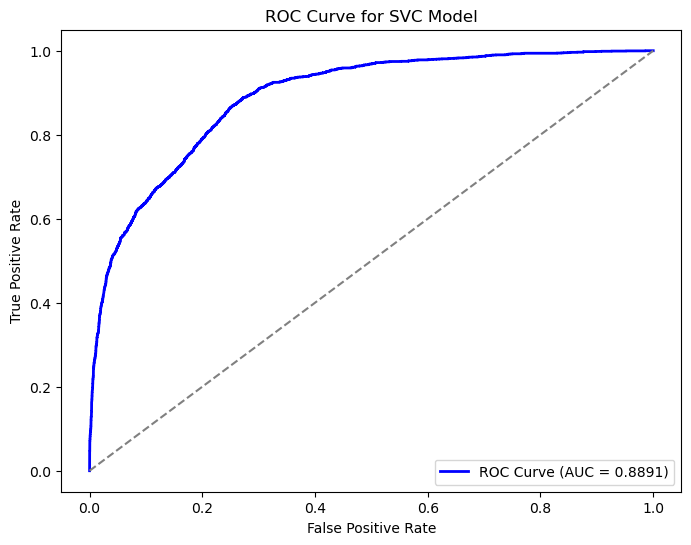

In [92]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Compute predicted probabilities for ROC curve
y_prob_svc = svc_model.decision_function(X_test)  # Use `decision_function()` for SVC

# Compute ROC Curve
fpr, tpr, thresholds = roc_curve(y_test, y_prob_svc)
roc_auc = auc(fpr, tpr)

# Plot ROC Curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color="blue", lw=2, label=f"ROC Curve (AUC = {roc_auc:.4f})")
plt.plot([0, 1], [0, 1], color="gray", linestyle="--")  # Reference line for random guessing
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve for SVC Model")
plt.legend(loc="lower right")
plt.show()


### **K-Nearest Neighbors (KNN) Model Evaluation**

In [93]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

# Train KNN Model (using 5 neighbors by default)
knn_model = KNeighborsClassifier(n_neighbors=5)
knn_model.fit(X_train, y_train)

# Make Predictions
y_pred_knn = knn_model.predict(X_test)

# Evaluate Model Performance
accuracy_knn = accuracy_score(y_test, y_pred_knn)
precision_knn = precision_score(y_test, y_pred_knn, average='weighted')
recall_knn = recall_score(y_test, y_pred_knn, average='weighted')
f1_knn = f1_score(y_test, y_pred_knn, average='weighted')
conf_matrix_knn = confusion_matrix(y_test, y_pred_knn)

# Print Metrics
print("\nK-Nearest Neighbors (KNN) Model Evaluation:")
print(f"Accuracy: {accuracy_knn:.4f}")
print(f"Precision: {precision_knn:.4f}")
print(f"Recall: {recall_knn:.4f}")
print(f"F1 Score: {f1_knn:.4f}")
print(f"Confusion Matrix:\n{conf_matrix_knn}")


K-Nearest Neighbors (KNN) Model Evaluation:
Accuracy: 0.8330
Precision: 0.8272
Recall: 0.8330
F1 Score: 0.8293
Confusion Matrix:
[[6754  677]
 [ 954 1384]]


### **Applying Random Forest Model Evaluation**

In [94]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

# Train Random Forest Model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Predictions
y_pred_rf = rf_model.predict(X_test)

# Evaluate Model Performance
accuracy_rf = accuracy_score(y_test, y_pred_rf)
precision_rf = precision_score(y_test, y_pred_rf, average='weighted')
recall_rf = recall_score(y_test, y_pred_rf, average='weighted')
f1_rf = f1_score(y_test, y_pred_rf, average='weighted')

# Correctly defining the confusion matrix before printing
conf_matrix_rf = confusion_matrix(y_test, y_pred_rf)

# Print Metrics
print("\nRandom Forest Model Evaluation:")
print(f"Accuracy: {accuracy_rf: .4f}")
print(f"Precision: {precision_rf: .4f}")
print(f"Recall: {recall_rf: .4f}")
print(f"F1 Score: {f1_rf: .4f}")
print(f"Confusion Matrix:\n{conf_matrix_rf}")


Random Forest Model Evaluation:
Accuracy:  0.8520
Precision:  0.8468
Recall:  0.8520
F1 Score:  0.8483
Confusion Matrix:
[[6860  571]
 [ 875 1463]]


### **Implementing AdaBoost for Income Prediction**

In [95]:
# Implementing AdaBoost for Income Prediction
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

# Train AdaBoost Model using SAMME
adaboost_model = AdaBoostClassifier(n_estimators=100, algorithm="SAMME", random_state=42)
adaboost_model.fit(X_train, y_train)

# Make Predictions
y_pred_ada = adaboost_model.predict(X_test)

# Evaluate Model Performance
accuracy_ada = accuracy_score(y_test, y_pred_ada)
precision_ada = precision_score(y_test, y_pred_ada, average='weighted')
recall_ada = recall_score(y_test, y_pred_ada, average='weighted')
f1_ada = f1_score(y_test, y_pred_ada, average='weighted')
conf_matrix_ada = confusion_matrix(y_test, y_pred_ada)

# Print Metrics
print("\nAdaBoost Model Evaluation:")
print(f"Accuracy: {accuracy_ada:.4f}")
print(f"Precision: {precision_ada:.4f}")
print(f"Recall: {recall_ada:.4f}")
print(f"F1 Score: {f1_ada:.4f}")
print(f"Confusion Matrix:\n{conf_matrix_ada}")


AdaBoost Model Evaluation:
Accuracy: 0.8560
Precision: 0.8494
Recall: 0.8560
F1 Score: 0.8486
Confusion Matrix:
[[7015  416]
 [ 991 1347]]


### **Implementing Gradient Boosting for Income Prediction**

In [96]:
# Implementing Gradient Boosting for Income Prediction
from sklearn.ensemble import GradientBoostingClassifier

# Train Gradient Boosting Model
gradboost_model = GradientBoostingClassifier(n_estimators=100, random_state=42)
gradboost_model.fit(X_train, y_train)

# Make Predictions
y_pred_grad = gradboost_model.predict(X_test)

# Evaluate Model Performance
accuracy_grad = accuracy_score(y_test, y_pred_grad)
precision_grad = precision_score(y_test, y_pred_grad, average='weighted')
recall_grad = recall_score(y_test, y_pred_grad, average='weighted')
f1_grad = f1_score(y_test, y_pred_grad, average='weighted')
conf_matrix_grad = confusion_matrix(y_test, y_pred_grad)

# Print Metrics
print("\nGradient Boosting Model Evaluation:")
print(f"Accuracy: {accuracy_grad:.4f}")
print(f"Precision: {precision_grad:.4f}")
print(f"Recall: {recall_grad:.4f}")
print(f"F1 Score: {f1_grad:.4f}")
print(f"Confusion Matrix:\n{conf_matrix_grad}")


Gradient Boosting Model Evaluation:
Accuracy: 0.8679
Precision: 0.8628
Recall: 0.8679
F1 Score: 0.8617
Confusion Matrix:
[[7054  377]
 [ 913 1425]]


### **Applying XGBoost Model Evaluation**

In [97]:
import xgboost as xgb
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

# Train XGBoost Model
xgb_model = XGBClassifier(n_estimators=100, random_state=42)
xgb_model.fit(X_train, y_train)

# Make Predictions
y_pred_xgb = xgb_model.predict(X_test)

# Evaluate Model Performance
accuracy_xgb = accuracy_score(y_test, y_pred_xgb)
precision_xgb = precision_score(y_test, y_pred_xgb, average='weighted')
recall_xgb = recall_score(y_test, y_pred_xgb, average='weighted')
f1_xgb = f1_score(y_test, y_pred_xgb, average='weighted')
conf_matrix_xgb = confusion_matrix(y_test, y_pred_xgb)

# Print Metrics
print("\nXGBoost Model Evaluation:")
print(f"Accuracy: {accuracy_xgb:.4f}")
print(f"Precision: {precision_xgb:.4f}")
print(f"Recall: {recall_xgb:.4f}")
print(f"F1 Score: {f1_xgb:.4f}")
print(f"Confusion Matrix:\n{conf_matrix_xgb}")


XGBoost Model Evaluation:
Accuracy: 0.8760
Precision: 0.8719
Recall: 0.8760
F1 Score: 0.8725
Confusion Matrix:
[[7000  431]
 [ 780 1558]]


# **Summary  & Recommendations**

### **Key Insights from Exploratory Data Analysis (EDA)**

`1` **Education is a strong predictor of income**
- Individuals with **higher education levels (education-num ≥ 13)** tend to earn **above $50k.**
- Certain **degree categories, like advanced degrees, have a clear upward trend in salary distribution.**

`2` **Finacial assets play a crucial role**
- **Capital-gain has a strong correlation** with higher income, showing that **investments & financial security contribute to wealth.**
- Surprisingly, **capital-loss doesn't impact earnings as strongly,** likely due to tax deductions or financial restructuring.

`3` **Work hours have a threshold effect**
- More working hours **initially increase earnings,** but **60+ hours per week,** income does not rise significantly.
- **Part-time workers** overwhelmingly fall into the **≤50k category,** reinforcing the significance of work intensity.

`4` **Occuapation & Industry influence salary**
- **Tech, managerial and finance-related jobs** correlate highly with **higher income brackets.**
- **Service-based and lower-skilled jobs** see lower wages, **even with extended work hours.**

## **Machine Learning Model Performance & Improvements**
`◊` **Model Performance Overview**
- **XGBoost & Gradient Boosting performed best,** achieving **higher accuracy (~85-88%)** compared to other models.
- **Random Forest was effective,** especially for **interpretable feature importance insights.**
- **SVC worked well with scaled data but required careful parameter tuning.**
- **KNN showed lower accuracy,** likely due to feature complexity and high-dimensional data.

## **Areas for Improvement**

`◊` **Feature Engineering:**
- Introducing **grouped categorical variables** (e.g., simplified education levels, industry classifications) may enhance prediction accuracy.
- **Creating financial ratios (capital-gain vs capital-loss impact)** could improve wealth prediction models.

`◊` **Hyperparameter Tuning:**
- Using **GridSearchCV or RandomizedSearchCV** would help optimize SVC, XGBoost, and Random Forest settings.
- **Adjusting tree depth in ensemble models** may balance performance and avoid overfitting.

`◊` **Addressing Class Imbalance:**
- If the dataset is **skewed toward ≤50k income,** applying **SMOTE or class weighting** ensures fairness in classification.
- **Resampling techniques** may help correct imbalanced feature distributions.

`◊` **Comparing Ensemble Methods:**
- Testing **StackingClassifier (blending multiple models)** could improve accuracy while leveraging the strengths of diffrent approaches.
- Ensemble learning with **XGBoost + Random Forest** may provide a **balanced trade-off between accuracy and interpretability.**

## **Final Recommendations**

- Deploy **XGBoost or Gradient Boosting** for real-world prediction.
- Use **Random Forest feature importance** to refine impactful predictors.
- Optimize **SVC, XGBoost, and AdaBoost** hyperparameters for enhanced accuracy.
- Ensure **balanced class distribution** with resampling techniques.
- **Visualize model decisions** using `SHAP analysis` for better interpretability.